In [11]:
'''필기숫자 인식 SVM'''
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

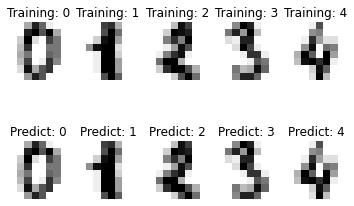

In [12]:
digits = datasets.load_digits()  # read data
_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)



'''
class sklearn.svm.SVC

C-Support Vector Classification.

Parameters :

# C: float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

# kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm.

etc...
'''
classifier = svm.SVC(kernel='rbf', gamma=0.001)  # use rbf kernel
classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)

test_data = X_test.reshape((len(X_test),8,8))
images_and_predictions = list(zip(test_data, predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_labels[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Predict: %i' % prediction)


SVM 분류 결과 SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


혼동 행렬:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


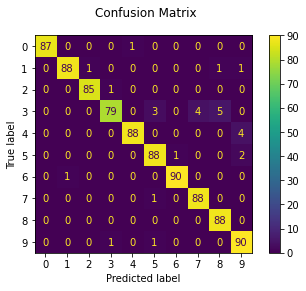

In [13]:
print("SVM 분류 결과 %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("혼동 행렬:\n%s" % disp.confusion_matrix)
print("정확도 : ", accuracy_score(y_test, predicted))

plt.show()